# <center> D2S1 | Logistic Regression using sklearn

---


    
## Dataset & Aim
- *Add this [dataset](https://drive.google.com/file/d/1eyJ9krzkAfEcP6mSmbYZ95SfeL5rEtcA/view?usp=sharing) to your Colab's session storage*         
- *It is for some of the real stars out there in cosmos collected mainly from web*        
- *It consists of some different features of stars based on which we need to classify the star types*         
- *We can know about several types of stars using Hertzsprung - Russell Diagrams*

*The image below shows how some features of stars like Temperature, Absolute Magnitude, Luminosity, e.t.c can help us identify the type of any star.*
<img src = "https://itu.physics.uiowa.edu/sites/itu.physics.uiowa.edu/files/2021-08/itu/hertzsprungrusselldiagramandstarclusters_hrdiagram.png" width = 480>
    
*There are several star types that are visible in the picture below out of which we are just going to focus on six of them.*

<img src = "https://chandra.harvard.edu/graphics/edu/formal/variable_stars/diagram.jpg" width = 480>

*Star types in the dataset we have contains following six types*      
    
***Star type in dataset $\rightarrow$ Star type names***       
- 0 $\rightarrow$ Brown Dwarf         
- 1 $\rightarrow$ Red Dwarf         
- 2 $\rightarrow$ White Dwarf        
- 3 $\rightarrow$ Main Sequence       
- 4 $\rightarrow$ Supergiants       
- 5 $\rightarrow$ Hypergiants        
    
*Now that we have some idea about our dataset, its time to explore it!*
    
## Creating the data frame
- *Let's read the csv file from the added dataset and create our dataframe.*

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


In [4]:
## Create the data frame
dataset_path = "/content/drive/My Drive/colab Notebooks/star dataset mini.csv"
star_df = pd.read_csv(dataset_path)
star_df.sample(10)

FileNotFoundError: ignored

In [ ]:
# General information of data frame
star_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


### Observations
1) Dataset consists of 240 rows, 6 feature and 1 target columns,
- *Absolute Temperature (in K)*    
- *Relative Luminosity (L/Lo)*
- *Relative Radius (R/Ro)*
- *Absolute Magnitude (Mv)*
- *Star Color*
- *Spectral Class*
- *Star Type (Target classes)*
    
Here,
- *Lo = 3.828 x 10^26 Watts (Avg Luminosity of Sun)*
- *Ro = 6.9551 x 10^8 m (Avg Radius of Sun)*
    
2) Two categorical features (object type) which will need some kind of encoding,
- *Star Color*
- *Spectral Class*

3) Missing values,
- *No missing values*



## Details on object data type columns

- *Let's begin with the Star color column*

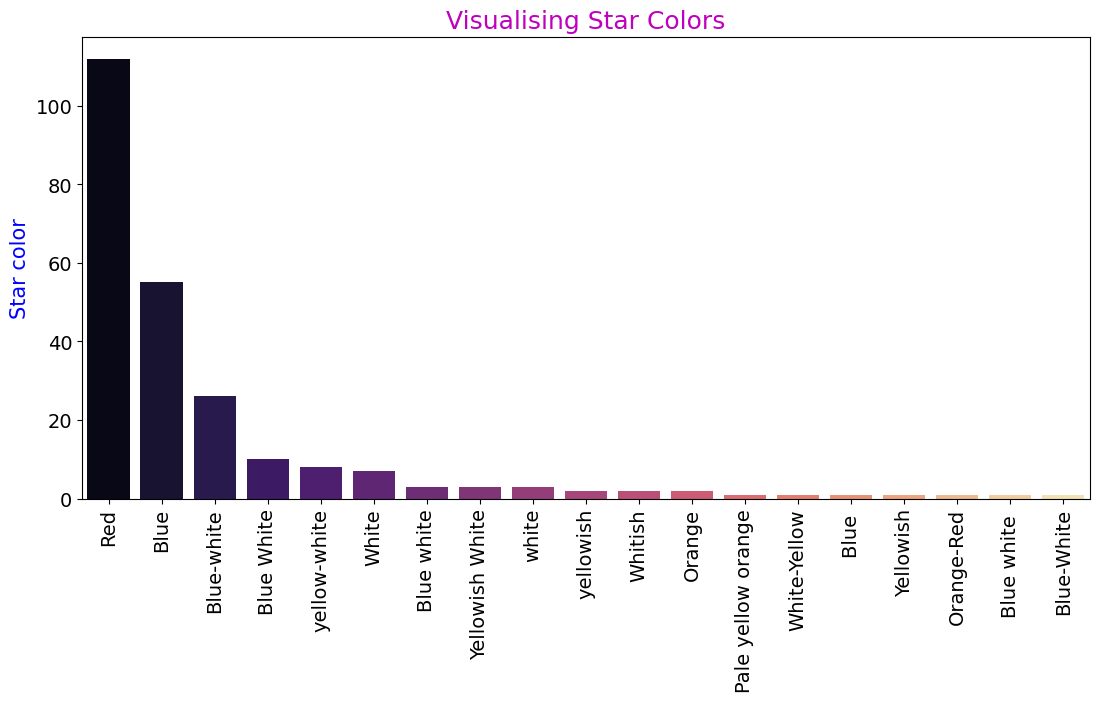

In [ ]:
## Visulaising the Star color data

# Adjusting figure size
plt.figure(figsize = (13, 6))

# Sorting in descending format for an eye soothing visualisation
color = pd.DataFrame(star_df['Star color'].value_counts().sort_values(ascending=False)) # New df to avoid changes in main

# Create bar plot for star color
ax = sns.barplot(x = color.index, y = 'Star color' , data = color, palette='magma') # Saving in ax variable to use it later

# Decorate the plot
plt.title("Visualising Star Colors", color = "m", fontsize = 18)  # Add title
plt.ylabel('Star color', color = 'b', fontsize = 15)              # Add y label
plt.xticks(fontsize = 14)                                         # Change x ticks size
plt.yticks(fontsize = 14)                                         # Change y ticks size
ax = ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)      # Rotate xticklabels by 90 degrees using ax variable


- Some colors are just repeated in different ways so it needs some cleaning
- Red, Blue, Blue - White, Yellow - White and White are the most observed colors


In [ ]:
## Simplest way of doing it manually
star_df.replace({"Star color" : {"Blue-white" : "Blue-White",
                                  "Blue White" : "Blue-White",
                                  "Blue white" : "Blue-White",
                                  "Blue white " : "Blue-White",
                                  "Blue-White" : "Blue-White",
                                  "yellow-white" : "Yellow-White",
                                  "Yellowish White" : "Yellow-White",
                                  "yellowish" : "Yellow-White",
                                  "White-Yellow" : "Yellow-White",
                                  "Yellowish" : "Yellow-White",
                                  "white" : "White",
                                  "Whitish" : "White",
                                  "Blue " : "Blue",
                                  "Pale yellow orange" : "Red",
                                  "Orange" : "Red",
                                  "Orange-Red" : "Red"}},
                                  inplace = True)

## Display the final Star color column after cleaning it
print("Color           Count\n-----------------------------\n", star_df['Star color'].value_counts())

Color           Count
-----------------------------
 Red             116
Blue             56
Blue-White       41
Yellow-White     15
White            12
Name: Star color, dtype: int64


- *We are done! All the repeated/similar type of colors have been merged together.*

Now let's move on to 'Spectral Class' and hope that no more data cleaning is required!

Class Count
-------------------
 M    111
B     46
O     40
A     19
F     17
K      6
G      1
Name: Spectral Class, dtype: int64





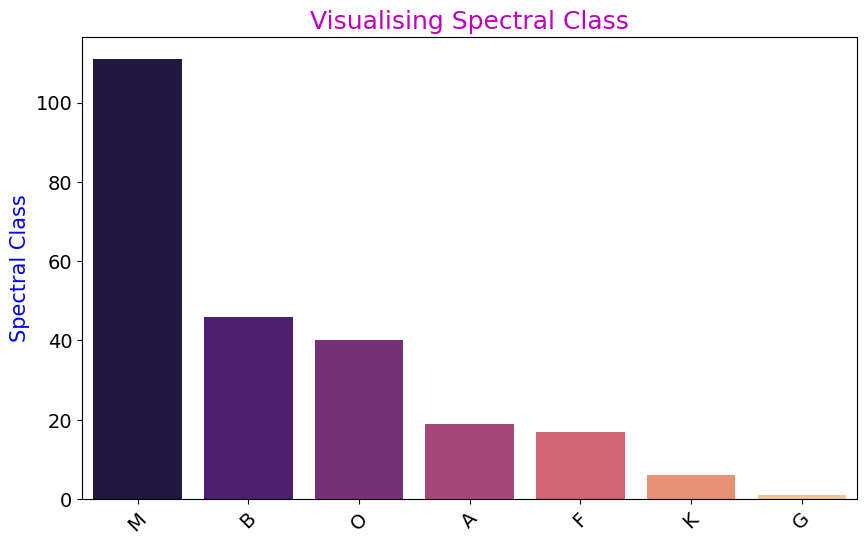

In [ ]:
## Check the input count for Spectral Class
print("Class Count\n-------------------\n", star_df['Spectral Class'].value_counts())

## Create new df which sorts spectral class in descending way
spectral_class = pd.DataFrame(star_df['Spectral Class'].value_counts().sort_values(ascending=False)) # New df to avoid
                                                                                                     # changes in main data
print("\n\n")

## Create the plot

# Set the size of the figure
plt.figure(figsize=(10, 6))

# Create barplot for spectral class
ax = sns.barplot(x = spectral_class.index, y = 'Spectral Class' , data = spectral_class, palette='magma')

# Decorate the plot
plt.title("Visualising Spectral Class", color = "m", fontsize = 18)  # title
plt.ylabel('Spectral Class', color = 'b', fontsize = 15)             # y label
plt.xticks(fontsize = 14)                                            # resize x ticks
plt.yticks(fontsize = 14)                                            # resize y ticks
ax = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)         # rotate x labels by 45 deg

Yes!! We don't need any data cleaning here!!!!

## Encoding using cat.codes     
Time to convert the categorical data into numeric data. There are many ways through which we can do it but for now we are choosing a technique called cat.codes.
- *Convert the columns into category data type*    
- *Use these category values for label encoding*     

In [ ]:
## Cat codes

# Converting star color into category and then performing cat codes encoding
star_df['Star color'] = star_df['Star color'].astype('category').cat.codes

# Converting spectral class into category and then performing cat codes encoding
star_df['Spectral Class'] = star_df['Spectral Class'].astype('category').cat.codes

# Display the encoded output
print("Star color Encoded Output ~\n", star_df['Star color'].value_counts(),
     "\n\n---------------------------------------------------------------",
      "\n\nSpectral Class Encoded Output ~\n", star_df['Spectral Class'].value_counts())

Star color Encoded Output ~
 2    116
0     56
1     41
4     15
3     12
Name: Star color, dtype: int64 

--------------------------------------------------------------- 

Spectral Class Encoded Output ~
 5    111
1     46
6     40
0     19
2     17
4      6
3      1
Name: Spectral Class, dtype: int64


Now we have the data type that our machine can understand!

### Quick Questions

Some information on star color and spectral class before we move onto questions

**Star color:-**           
*From cooler to hotter stars have colors as Red, Orange, Yellow, White*      
*Younger stars appear bluer while older ones are more of reddish*

**Spectral class:-**    
*From hotter to cooler stars follow this spectral type O B A F G K M*

**Q.** ***What kind of encoding has been used above?***    
**A)** *Nominal Encoding - There is no order or rank to this varaiable's feature*    
**B)** *Ordinal Encoding - There is an order or a rank to this variable's feature*     

**Q.** ***Was this a proper choice for encoding on both the features?***    
**A)** *Yes! We are good to proceed ahead.*          
**B)** *Nope! We need other way of encoding.*         



#### Pearson Correlation

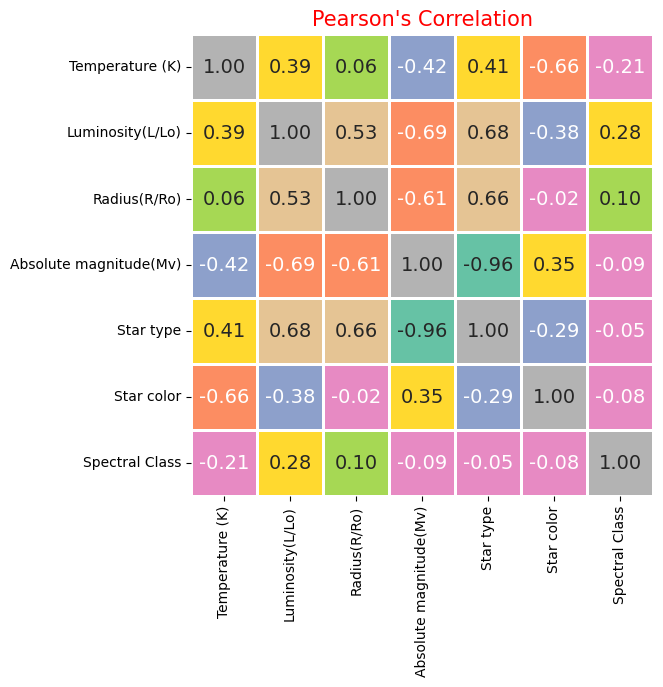

In [ ]:
# Pearson Correlation Matrix
pc_mat = star_df.corr()

# Setting the figure size
fig, ax = plt.subplots(figsize = (8, 6))

# Create heatmap to visualise the correlation
sns.heatmap(pc_mat, cmap = 'Set2', cbar = False, annot = True, annot_kws = {"size" : 14},ax = ax,
           fmt = '.2f', linewidth = 2, square = True)

# Add title to plot
fig = plt.title("Pearson's Correlation", fontsize = 15, color = 'red')


## Check if data is balanced

- *Balanced data means all the targets have same count*
- *More similar the count of targets, more balanced is the data*
- *If data is not balanced, we can use some techniques to fix this like under or over sampling*

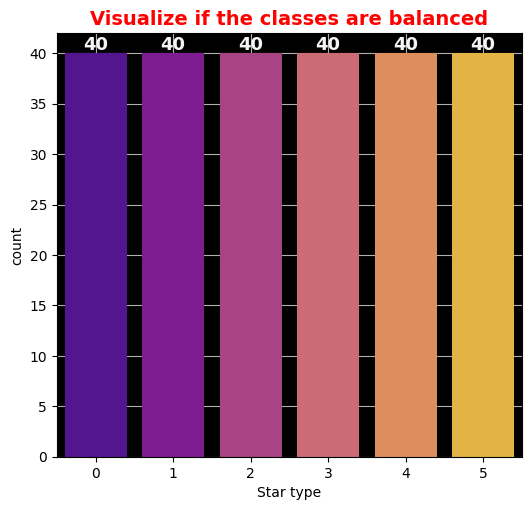

In [ ]:
# Create a count plot to display the count of starts for every star type
plt.figure(figsize = (6,5.5))
ax = sns.countplot(x=star_df['Star type'], palette = "plasma")
ax.set_facecolor("black")
plt.grid()
ax.set_axisbelow(True)
ax.bar_label(ax.containers[0], color = 'whitesmoke', fontsize = 13, weight = 'bold')
plt.title("Visualize if the classes are balanced", color = 'r', weight = 'bold', fontsize = 14)
plt.show()

- *We have a very balanced data! Lets proceed with Logisitc Regression*

In [ ]:
## For Logistic Regression
from sklearn.linear_model import LogisticRegression
## Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
## Metrics for evaluation of the model
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
## Features
x = star_df.drop('Star type',axis=1)

## Target
y = star_df['Star type']

## Perform the split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

## Check the shape
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((216, 6), (24, 6), (216,), (24,))

Check the official documentation of `LogisticRegression` [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

In [ ]:
## Build and train the mutinomial logisitic regression classifier
logreg = LogisticRegression(random_state=42, multi_class='multinomial', max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42)

In [ ]:
## Predictions + Report
predictions = logreg.predict(X_test)
print(predictions)

[2 0 3 4 4 5 5 2 0 2 4 2 5 4 5 5 0 1 3 0 0 1 5 3]


**Convert the test values to its respective labels as mentioned below:**              
- 0 $\rightarrow$ Brown Dwarf
- 1 $\rightarrow$ Red Dwarf
- 2 $\rightarrow$ White Dwarf
- 3 $\rightarrow$ Main Sequence
- 4 $\rightarrow$ Supergiants
- 5 $\rightarrow$ Hypergiants

In [ ]:
## Convert these star type values to original labels
#  for confusion matrix using test array

## Setting the data type as object to do the conversion
test = y_test.values.astype('object')

## Going through every values and converting them to respective labels
for i in range(len(test)):
    if test[i] == 0:
        test[test == 0] = 'Brown Dwarf'
    elif test[i] == 1:
        test[test == 1] = 'Red Dwarf'
    elif test[i] == 2:
        test[test == 2] = 'White Dwarf'
    elif test[i] == 3:
        test[test == 3] = 'Main Sequence'
    elif test[i] == 4:
        test[test == 4] = 'Supergiants'
    elif test[i] == 5:
        test[test == 5] = 'Hypergiants'

In [ ]:
## Check if the values were successfully converted to labels
labels = np.unique(test)
print(labels.reshape(6,1))

[['Brown Dwarf']
 ['Hypergiants']
 ['Main Sequence']
 ['Red Dwarf']
 ['Supergiants']
 ['White Dwarf']]


- *So we got all our required labels to display on the plot of confusion matrix*

In [ ]:
cm = confusion_matrix(y_test, predictions)

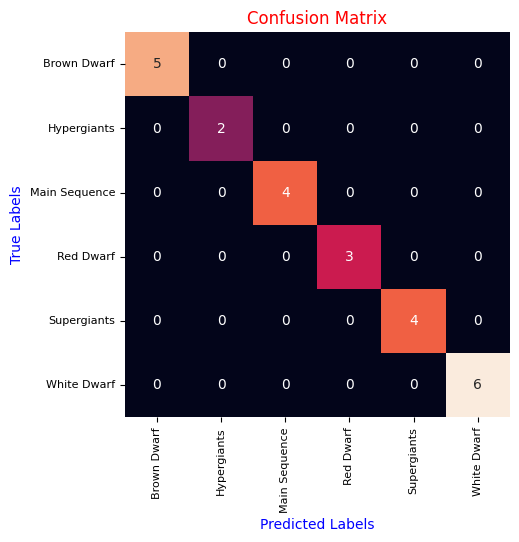

In [ ]:
# Adjusting size of the plot
fig, ax = plt.subplots(figsize = (5,5))

# Plotting the confusion matrix with converted labels on axes
sns.heatmap(cm,xticklabels=labels, yticklabels=labels, annot=True, cbar=False,
            square=True)

# Turing off the grind display
plt.grid(False)

# Adding the title
plt.title("Confusion Matrix", color = 'r', fontsize = 12)

# Adding the title for x and y axis
plt.xlabel("Predicted Labels", color = 'b', fontsize = 10)
plt.ylabel("True Labels", color = 'b', fontsize = 10)

# Ticks rotation to avoid clustering of names and increasing font size
plt.xticks(rotation = 90, fontsize = 8)
plt.yticks(fontsize = 8)

# Display the plot
plt.show()

In [ ]:
## Classification report
print('\t\t', '*'*5, 'Classification Report', '*'*5, '\n')
print(classification_report(y_test, predictions))

		 ***** Classification Report ***** 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         6

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24



In [ ]:
## Target values in test dataset
test = y_test.values
print("This is how the test target values are:-")
print(test)

## Predicted values
print("\nThis is how the predicted values are:-")
print(predictions)

# If test matched prediction store it as 1 else as 0
matched = []
for i in range(len(test)):
    if test[i] == predictions[i]:
        matched.append(1)
    else:
        matched.append(0)

# acc = #correct_preds / #all_preds
acc = np.sum(matched)/len(predictions) * 100

# Display the acc score calculated manually
print("\nThe accuracy of this model is:- ", acc, "%")

This is how the test target values are:-
[2 0 3 4 4 5 5 2 0 2 4 2 5 4 5 5 0 1 3 0 0 1 5 3]

This is how the predicted values are:-
[2 0 3 4 4 5 5 2 0 2 4 2 5 4 5 5 0 1 3 0 0 1 5 3]

The accuracy of this model is:-  100.0 %
